In [4]:
from google.colab import files
files.upload()

Saving kaggle (1).json to kaggle (1).json


{'kaggle (1).json': b'{"username":"heidaryamirmohammad","key":"6dacba8f039181aed0c5bde7edccd313"}'}

In [5]:
!mv "kaggle (1).json" kaggle.json

In [6]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
!kaggle datasets download -d ssarkar445/covid-19-xray-and-ct-scan-image-dataset

Dataset URL: https://www.kaggle.com/datasets/ssarkar445/covid-19-xray-and-ct-scan-image-dataset
License(s): unknown


In [8]:
import zipfile

with zipfile.ZipFile('/content/covid-19-xray-and-ct-scan-image-dataset.zip','r') as ref_file:
  ref_file.extractall('covid')

In [9]:
import os
from PIL import Image

covid_ct_path = '/content/covid/COVID-19 Dataset/CT/COVID'
normal_ct_path = '/content/covid/COVID-19 Dataset/CT/Non-COVID'
covid_xray_path = '/content/covid/COVID-19 Dataset/X-ray/COVID'
normal_xray_path = '/content/covid/COVID-19 Dataset/X-ray/Non-COVID'

new_folder1 = os.makedirs('convert_covid',exist_ok= True)
new_folder1_2 = os.makedirs('convert_covid/ct',exist_ok= True)
new_folder1_3 = os.makedirs('convert_covid/xray',exist_ok= True)
new_folder2_1 = os.makedirs('convert_covid/ct/covid',exist_ok= True)
new_folder2_2 = os.makedirs('convert_covid/ct/normal',exist_ok= True)
new_folder3_1 = os.makedirs('convert_covid/xray/covid',exist_ok= True)
new_folder3_2 = os.makedirs('convert_covid/xray/normal',exist_ok= True)

convert_covid_ct_path = '/content/convert_covid/ct/covid'
convert_normal_ct_path = '/content/convert_covid/ct/normal'
convert_covid_xray_path = '/content/convert_covid/xray/covid'
convert_normal_xray_path = '/content/convert_covid/xray/normal'

for filename in os.listdir(covid_ct_path):

  image_path = covid_ct_path + f'/{filename}'
  image = Image.open(image_path)
  image.convert('RGB')

  new_filename = os.path.splitext(filename)[0]+'.tiff'
  image.save(convert_covid_ct_path+f'/{new_filename}')

for filename in os.listdir(normal_ct_path):

  image_path = normal_ct_path + f'/{filename}'
  image = Image.open(image_path)
  image.convert('RGB')

  new_filename = os.path.splitext(filename)[0]+'.tiff'
  image.save(convert_normal_ct_path+f'/{new_filename}')

for filename in os.listdir(covid_xray_path):

  image_path = covid_xray_path + f'/{filename}'
  image = Image.open(image_path)
  image.convert('RGB')

  new_filename = os.path.splitext(filename)[0]+'.tiff'
  image.save(convert_covid_xray_path+f'/{new_filename}')

for filename in os.listdir(normal_xray_path):

  image_path = normal_xray_path + f'/{filename}'
  image = Image.open(image_path)
  image.convert('RGB')

  new_filename = os.path.splitext(filename)[0]+'.tiff'
  image.save(convert_normal_xray_path+f'/{new_filename}')

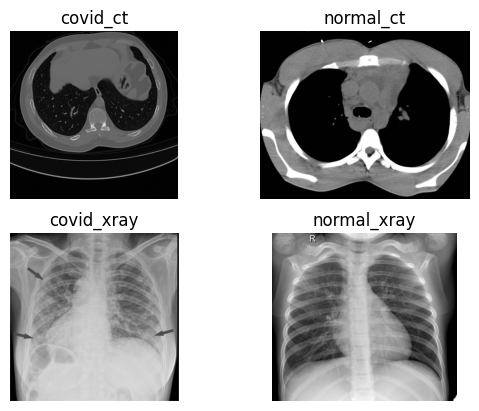

In [11]:
import matplotlib.pyplot as plt
import cv2

covid_ct = os.listdir('/content/convert_covid/ct/covid')
normal_ct = os.listdir('/content/convert_covid/ct/normal')
covid_xray = os.listdir('/content/convert_covid/xray/covid')
normal_xray = os.listdir('/content/convert_covid/xray/normal')

covid_ct_image = cv2.imread(convert_covid_ct_path + f'/{covid_ct[0]}')
normal_ct_image = cv2.imread(convert_normal_ct_path + f'/{normal_ct[0]}')
covid_xray_image = cv2.imread(convert_covid_xray_path + f'/{covid_xray[0]}')
normal_xray_image = cv2.imread(convert_normal_xray_path + f'/{normal_xray[0]}')

fig , ax = plt.subplots(2,2)
ax[0,0].imshow(covid_ct_image)
ax[0,0].set_title('covid_ct')
ax[0,0].axis('off')
ax[0,1].imshow(normal_ct_image)
ax[0,1].set_title('normal_ct')
ax[0,1].axis('off')
ax[1,0].imshow(covid_xray_image)
ax[1,0].set_title('covid_xray')
ax[1,0].axis('off')
ax[1,1].imshow(normal_xray_image)
ax[1,1].set_title('normal_xray')
ax[1,1].axis('off');

In [12]:
import random

random.seed(42)
n_covid = 500
n_normal = 1000

sub_covid_ct = random.sample(covid_ct,n_covid)
sub_normal_ct = random.sample(normal_ct,n_normal)

sub_covid_xray = random.sample(covid_xray,n_covid)
sub_normal_xray = random.sample(normal_xray,n_normal)

In [13]:
import torchvision.transforms as transforms

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((224,224)),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])


x_covid_ct = []
x_normal_ct = []
y_ct = []
x_covid_xray = []
x_normal_xray = []
y_xray = []

for pic in sub_covid_ct:
 x_covid_ct.append(transform(cv2.imread(convert_covid_ct_path+f'/{pic}')))
 y_ct.append(1)

for pic in sub_normal_ct:
  x_normal_ct.append(transform(cv2.imread(convert_normal_ct_path+f'/{pic}')))
  y_ct.append(0)

for pic in sub_covid_xray:
  x_covid_xray .append(transform(cv2.imread(convert_covid_xray_path+f'/{pic}')))
  y_xray.append(1)

for pic in sub_normal_xray:
  x_normal_xray.append(transform(cv2.imread(convert_normal_xray_path+f'/{pic}')))
  y_xray.append(0)

In [14]:
x_ct = x_covid_ct + x_normal_ct
x_xray = x_covid_xray + x_normal_xray

In [15]:
from sklearn.model_selection import train_test_split

x_train_ct,x_test_ct,y_train_ct,y_test_ct = train_test_split(x_ct,y_ct,test_size = 0.15,random_state = 42,shuffle = True,stratify = y_ct)
x_train_ct,x_val_ct,y_train_ct,y_val_ct = train_test_split(x_train_ct,y_train_ct,test_size = 0.15,random_state = 42,shuffle = True,stratify = y_train_ct)

x_train_xray,x_test_xray,y_train_xray,y_test_xray = train_test_split(x_xray,y_xray,test_size = 0.15,random_state = 42,shuffle = True,stratify = y_xray)
x_train_xray,x_val_xray,y_train_xray,y_val_xray = train_test_split(x_train_xray,y_train_xray,test_size = 0.15,random_state = 42,shuffle = True,stratify = y_train_xray)

In [16]:
import torch
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((224,224)),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
x_train_ct,x_val_ct,x_test_ct = torch.stack(x_train_ct),torch.stack(x_val_ct),torch.stack(x_test_ct)
x_train_xray,x_val_xray,x_test_xray = torch.stack(x_train_xray),torch.stack(x_val_xray),torch.stack(x_test_xray)
y_train_ct,y_val_ct,y_test_ct = torch.tensor(y_train_ct),torch.tensor(y_val_ct),torch.tensor(y_test_ct)
y_train_xray,y_val_xray,y_test_xray = torch.tensor(y_train_xray),torch.tensor(y_val_xray),torch.tensor(y_test_xray)

In [17]:
from torch.utils.data import TensorDataset,DataLoader
train_ct_set = TensorDataset(x_train_ct,y_train_ct)
val_ct_set = TensorDataset(x_val_ct,y_val_ct)
test_ct_set = TensorDataset(x_test_ct,y_test_ct)

train_xray_set = TensorDataset(x_train_xray,y_train_xray)
val_xray_set = TensorDataset(x_val_xray,y_val_xray)
test_xray_set = TensorDataset(x_test_xray,y_test_xray)

In [18]:
train_ct_loader = DataLoader(train_ct_set,batch_size = 128,shuffle = True, drop_last=False)
val_ct_loader = DataLoader(val_ct_set,batch_size = 256,shuffle = True, drop_last=False)
test_ct_loader = DataLoader(test_ct_set,batch_size = 256,shuffle = True, drop_last=False)

train_xray_loader = DataLoader(train_xray_set,batch_size = 128,shuffle = True, drop_last=False)
val_xray_loader = DataLoader(val_xray_set,batch_size = 256,shuffle = True, drop_last=False)
test_xray_loader = DataLoader(test_xray_set,batch_size = 256,shuffle = True, drop_last=False)

In [19]:
import torchvision.models as models

all_models = dir(models)

print(all_models)

['AlexNet', 'AlexNet_Weights', 'ConvNeXt', 'ConvNeXt_Base_Weights', 'ConvNeXt_Large_Weights', 'ConvNeXt_Small_Weights', 'ConvNeXt_Tiny_Weights', 'DenseNet', 'DenseNet121_Weights', 'DenseNet161_Weights', 'DenseNet169_Weights', 'DenseNet201_Weights', 'EfficientNet', 'EfficientNet_B0_Weights', 'EfficientNet_B1_Weights', 'EfficientNet_B2_Weights', 'EfficientNet_B3_Weights', 'EfficientNet_B4_Weights', 'EfficientNet_B5_Weights', 'EfficientNet_B6_Weights', 'EfficientNet_B7_Weights', 'EfficientNet_V2_L_Weights', 'EfficientNet_V2_M_Weights', 'EfficientNet_V2_S_Weights', 'GoogLeNet', 'GoogLeNetOutputs', 'GoogLeNet_Weights', 'Inception3', 'InceptionOutputs', 'Inception_V3_Weights', 'MNASNet', 'MNASNet0_5_Weights', 'MNASNet0_75_Weights', 'MNASNet1_0_Weights', 'MNASNet1_3_Weights', 'MaxVit', 'MaxVit_T_Weights', 'MobileNetV2', 'MobileNetV3', 'MobileNet_V2_Weights', 'MobileNet_V3_Large_Weights', 'MobileNet_V3_Small_Weights', 'RegNet', 'RegNet_X_16GF_Weights', 'RegNet_X_1_6GF_Weights', 'RegNet_X_32GF_

In [20]:
resnet_ct = models.resnet50(pretrained =  True)
resnet_xray = models.resnet50(pretrained =  True)
print(resnet_ct)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 162MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [21]:
for param in resnet_ct.parameters():
  param.requires_grad = False

for param in resnet_xray.parameters():
  param.requires_grad = False

In [22]:
import torch.nn as nn

resnet_ct.fc = nn.Sequential(
    nn.Linear(2048,1000,bias=True),
    nn.LeakyReLU(0.1),
    nn.Linear(1000,100,bias = True),
    nn.LeakyReLU(0.1),
    nn.Dropout(0.5),
    nn.Linear(100,1,bias = True),
    nn.Sigmoid()
)

resnet_xray.fc = nn.Sequential(
    nn.Linear(2048,1000,bias=True),
    nn.LeakyReLU(0.1),
    nn.Linear(1000,100,bias = True),
    nn.LeakyReLU(0.1),
    nn.Dropout(0.5),
    nn.Linear(100,1,bias = True),
    nn.Sigmoid()
)

In [31]:
for param in resnet_ct.fc.parameters():
  param.requires_grad = True

for param in resnet_xray.fc.parameters():
  param.requires_grad = True

In [32]:
for name,param in resnet_ct.named_parameters():
  print(name,param.requires_grad)

conv1.weight False
bn1.weight False
bn1.bias False
layer1.0.conv1.weight False
layer1.0.bn1.weight False
layer1.0.bn1.bias False
layer1.0.conv2.weight False
layer1.0.bn2.weight False
layer1.0.bn2.bias False
layer1.0.conv3.weight False
layer1.0.bn3.weight False
layer1.0.bn3.bias False
layer1.0.downsample.0.weight False
layer1.0.downsample.1.weight False
layer1.0.downsample.1.bias False
layer1.1.conv1.weight False
layer1.1.bn1.weight False
layer1.1.bn1.bias False
layer1.1.conv2.weight False
layer1.1.bn2.weight False
layer1.1.bn2.bias False
layer1.1.conv3.weight False
layer1.1.bn3.weight False
layer1.1.bn3.bias False
layer1.2.conv1.weight False
layer1.2.bn1.weight False
layer1.2.bn1.bias False
layer1.2.conv2.weight False
layer1.2.bn2.weight False
layer1.2.bn2.bias False
layer1.2.conv3.weight False
layer1.2.bn3.weight False
layer1.2.bn3.bias False
layer2.0.conv1.weight False
layer2.0.bn1.weight False
layer2.0.bn1.bias False
layer2.0.conv2.weight False
layer2.0.bn2.weight False
layer2.0.bn2

In [42]:
import torch.optim as optim
ct_loss_fn = nn.BCELoss()
ct_optimizer = optim.Adam(resnet_ct.parameters(),lr = 0.001)

xray_loss_fn = nn.BCELoss()
xray_optimizer = optim.Adam(resnet_xray.parameters(),lr = 0.001)

In [43]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
resnet_ct.to(device)
resnet_xray.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [44]:
epochs = 50
mean_val_loss = torch.tensor(float('inf'))

ct_train_accuracy_list,ct_val_accuracy_list = [],[]
ct_train_loss_list,ct_val_loss_list = [],[]

for epoch in range(epochs):

  resnet_ct.train()
  train_losses,val_losses = 0,0
  train_accuracy,val_accuracy = 0,0

  for i,(image_batch,label_batch) in enumerate(train_ct_loader):

    image_batch = image_batch.to(device)
    label_batch = label_batch.to(device)

    y_hat = resnet_ct(image_batch)
    train_accuracy += (y_hat.round()==label_batch.unsqueeze(1)).float().sum().item()
    loss = ct_loss_fn(y_hat,label_batch.unsqueeze(1).float())
    train_losses += loss.item()*len(image_batch)
    loss.backward()
    ct_optimizer.step()
    ct_optimizer.zero_grad()


  resnet_ct.eval()
  with torch.no_grad():

    for i,(image_batch,label_batch) in enumerate(val_ct_loader):

      image_batch = image_batch.to(device)
      label_batch = label_batch.to(device)

      y_hat = resnet_ct(image_batch)
      val_accuracy += (y_hat.round()==label_batch.unsqueeze(1)).float().sum().item()
      loss = ct_loss_fn(y_hat,label_batch.unsqueeze(1).float())
      val_losses += loss.item()*len(image_batch)

  train_accuracy = train_accuracy/len(train_ct_set)
  ct_train_accuracy_list.append(train_accuracy)
  ct_train_loss_list.append(train_losses/len(val_ct_set))

  val_accuracy = val_accuracy/len(val_ct_set)
  ct_val_accuracy_list.append(val_accuracy)
  ct_val_loss_list.append(val_losses/len(val_ct_set))

  print(f'\nin epoch {epoch+1} mean train loss is {train_losses/len(train_ct_set)}'
        f' mean train accuracy is {train_accuracy}'
        f' mean val loss is {val_losses/len(val_ct_set)}'
        f' mean val accuracy is {val_accuracy}')
  if val_losses/len(val_ct_set) < mean_val_loss:
    mean_val_loss = val_losses/len(val_ct_set)
    torch.save(resnet_ct.state_dict(),'resnet_ct.pt')



in epoch 1 mean train loss is 0.6741907693865337 mean train accuracy is 0.8522622345337026 mean val loss is 0.24621061980724335 mean val accuracy is 0.8958333333333334

in epoch 2 mean train loss is 0.25139797504368694 mean train accuracy is 0.9048938134810711 mean val loss is 0.34398528933525085 mean val accuracy is 0.890625

in epoch 3 mean train loss is 0.13188485589329005 mean train accuracy is 0.9316712834718375 mean val loss is 0.27663037180900574 mean val accuracy is 0.8854166666666666

in epoch 4 mean train loss is 0.07067519752781697 mean train accuracy is 0.9787626962142197 mean val loss is 0.41708657145500183 mean val accuracy is 0.90625

in epoch 5 mean train loss is 0.051277082953481684 mean train accuracy is 0.9806094182825484 mean val loss is 0.4828978478908539 mean val accuracy is 0.90625

in epoch 6 mean train loss is 0.037474949047010694 mean train accuracy is 0.9824561403508771 mean val loss is 0.46279746294021606 mean val accuracy is 0.890625

in epoch 7 mean train

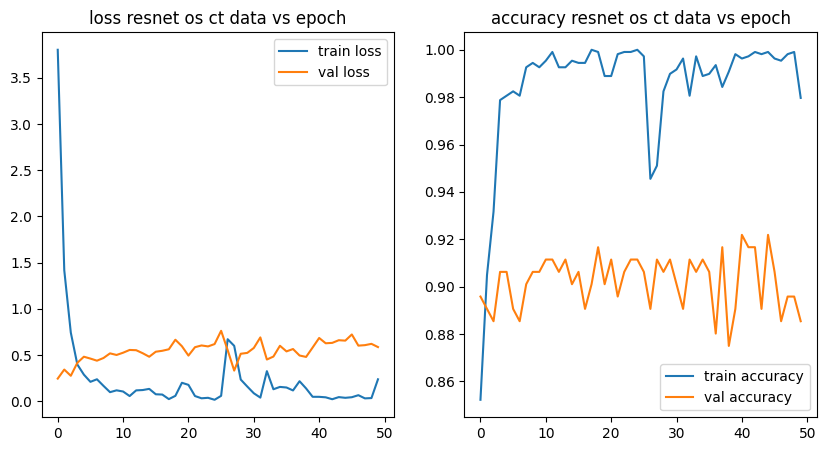

In [45]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(1,2,figsize = (10,5))

ax[0].plot(range(epochs),ct_train_loss_list,label = 'train loss')
ax[0].plot(range(epochs),ct_val_loss_list,label = 'val loss')
ax[0].set_title('loss resnet os ct data vs epoch')
ax[0].legend()

ax[1].plot(range(epochs),ct_train_accuracy_list,label = 'train accuracy')
ax[1].plot(range(epochs),ct_val_accuracy_list,label = 'val accuracy')
ax[1].set_title('accuracy resnet os ct data vs epoch')
ax[1].legend();

In [46]:
epochs = 50
mean_val_loss = torch.tensor(float('inf'))

xray_train_accuracy_list,xray_val_accuracy_list = [],[]
xray_train_loss_list,xray_val_loss_list = [],[]

for epoch in range(epochs):

  resnet_xray.train()
  train_losses,val_losses = 0,0
  train_accuracy,val_accuracy = 0,0

  for i,(image_batch,label_batch) in enumerate(train_xray_loader):

    image_batch = image_batch.to(device)
    label_batch = label_batch.to(device)

    y_hat = resnet_xray(image_batch)
    train_accuracy += (y_hat.round()==label_batch.unsqueeze(1)).float().sum().item()
    loss = xray_loss_fn(y_hat,label_batch.unsqueeze(1).float())
    train_losses += loss.item()*len(image_batch)
    loss.backward()
    xray_optimizer.step()
    xray_optimizer.zero_grad()

  resnet_xray.eval()
  with torch.no_grad():

    for i,(image_batch,label_batch) in enumerate(val_xray_loader):

      image_batch = image_batch.to(device)
      label_batch = label_batch.to(device)

      y_hat = resnet_xray(image_batch)
      val_accuracy += (y_hat.round()==label_batch.unsqueeze(1)).float().sum().item()
      loss = xray_loss_fn(y_hat,label_batch.unsqueeze(1).float())
      val_losses += loss.item()*len(image_batch)

  train_accuracy = train_accuracy/len(train_xray_set)
  xray_train_accuracy_list.append(train_accuracy)
  xray_train_loss_list.append(train_losses/len(val_xray_set))

  val_accuracy = val_accuracy/len(val_xray_set)
  xray_val_accuracy_list.append(val_accuracy)
  xray_val_loss_list.append(val_losses/len(val_xray_set))

  print(f'\nin epoch {epoch+1} mean train loss is {train_losses/len(train_xray_set)}'
        f'mean train accuracy is {train_accuracy}'
        f'mean val loss is {val_losses/len(val_xray_set)}'
        f'mean val accuracy is {val_accuracy}')
  if val_losses/len(val_xray_set) < mean_val_loss:
    mean_val_loss = val_losses/len(val_xray_set)
    torch.save(resnet_xray.state_dict(),'resnet_xray.pt')



in epoch 1 mean train loss is 0.6287325730724458mean train accuracy is 0.6251154201292706mean val loss is 0.4994063973426819mean val accuracy is 0.7604166666666666

in epoch 2 mean train loss is 0.4654281291274813mean train accuracy is 0.7562326869806094mean val loss is 0.4070360064506531mean val accuracy is 0.8072916666666666

in epoch 3 mean train loss is 0.38649392606809196mean train accuracy is 0.8088642659279779mean val loss is 0.3840271234512329mean val accuracy is 0.7864583333333334

in epoch 4 mean train loss is 0.4081134948318795mean train accuracy is 0.8125577100646353mean val loss is 0.40546995401382446mean val accuracy is 0.8229166666666666

in epoch 5 mean train loss is 0.3510316892949278mean train accuracy is 0.8245614035087719mean val loss is 0.42985081672668457mean val accuracy is 0.8333333333333334

in epoch 6 mean train loss is 0.34472119772423226mean train accuracy is 0.840258541089566mean val loss is 0.3592275083065033mean val accuracy is 0.875

in epoch 7 mean tra

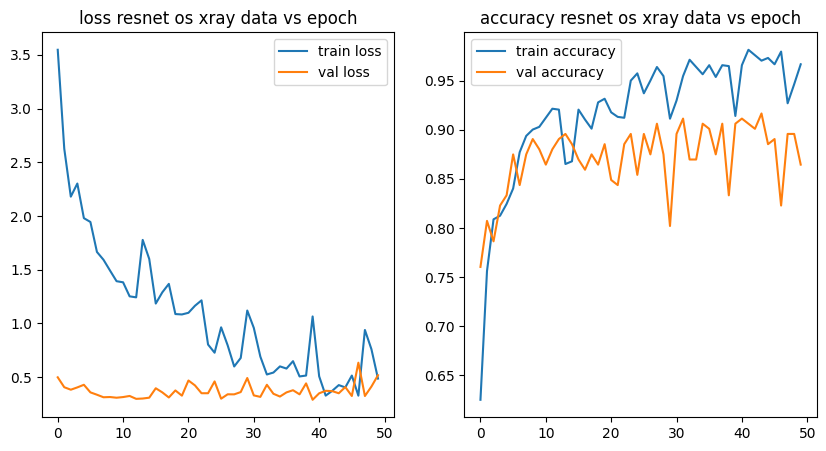

In [48]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(1,2,figsize = (10,5))

ax[0].plot(range(epochs),xray_train_loss_list,label = 'train loss')
ax[0].plot(range(epochs),xray_val_loss_list,label = 'val loss')
ax[0].set_title('loss resnet os xray data vs epoch')
ax[0].legend()

ax[1].plot(range(epochs),xray_train_accuracy_list,label = 'train accuracy')
ax[1].plot(range(epochs),xray_val_accuracy_list,label = 'val accuracy')
ax[1].set_title('accuracy resnet os xray data vs epoch')
ax[1].legend();

In [52]:
resnet_ct.load_state_dict(torch.load('resnet_ct.pt'))
resnet_xray.load_state_dict(torch.load('resnet_xray.pt'))

<All keys matched successfully>

In [53]:
from sklearn.metrics import classification_report,confusion_matrix

y_hat_ct =[]
y_true_ct = []

for image_batch , label_batch in test_ct_loader:
  image_batch = image_batch.to(device)
  label_batch = label_batch.to(device)

  resnet_ct.eval()
  with torch.no_grad():
    y_pred = resnet_ct(image_batch)

  preds = (y_pred>0.5).int().squeeze()

  y_hat_ct.extend(preds.cpu().numpy())
  y_true_ct.extend(label_batch.cpu().numpy())

conf_mat_ct = confusion_matrix(y_true_ct,y_hat_ct)
print(classification_report(y_true_ct,y_hat_ct))
print(conf_mat_ct)

              precision    recall  f1-score   support

           0       0.92      0.91      0.91       150
           1       0.82      0.84      0.83        75

    accuracy                           0.88       225
   macro avg       0.87      0.87      0.87       225
weighted avg       0.89      0.88      0.88       225

[[136  14]
 [ 12  63]]


In [54]:
from sklearn.metrics import classification_report,confusion_matrix

y_hat_xray =[]
y_true_xray = []

for image_batch , label_batch in test_xray_loader:
  image_batch = image_batch.to(device)
  label_batch = label_batch.to(device)

  resnet_xray.eval()
  with torch.no_grad():
    y_pred = resnet_xray(image_batch)

  preds = (y_pred>0.5).int().squeeze()

  y_hat_xray.extend(preds.cpu().numpy())
  y_true_xray.extend(label_batch.cpu().numpy())

conf_mat_xray = confusion_matrix(y_true_xray,y_hat_xray)
print(classification_report(y_true_xray,y_hat_xray))
print(conf_mat_xray)

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       150
           1       0.82      0.75      0.78        75

    accuracy                           0.86       225
   macro avg       0.85      0.83      0.84       225
weighted avg       0.86      0.86      0.86       225

[[138  12]
 [ 19  56]]
